## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
df_heart = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [4]:
X = df_heart.drop("diagnosis", axis=1)
y = df_heart["diagnosis"]

In [5]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None), ["age", "chol"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("selection", ct),
  ("logestic_regression", LogisticRegression())]
).set_output(transform="pandas")

pipeline.fit(X, y)
logistic_regression_model = pipeline.named_steps["logestic_regression"]

coef1 = logistic_regression_model.coef_[0]
intercept1 = logistic_regression_model.intercept_[0]

C:\Users\morag\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [6]:
# log-odds = intercept + B1x1 + B2x2

cutoff_50 = (np.log(1) - intercept1 - (coef1[0] * 55)) / coef1[1]
cutoff_90 = (np.log(0.9/0.1) - intercept1 - (coef1[0] * 55)) / coe1f[1]
cutoff_50, cutoff_90

NameError: name 'coe1f' is not defined

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [18]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None), ["age", "chol"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("selection", ct),
  ("lda", LinearDiscriminantAnalysis())]
).set_output(transform="pandas")

pipeline.fit(X, y)
lda = pipeline.named_steps["lda"]

coef2 = lda.coef_[0]
intercept2 = lda.intercept_[0]

C:\Users\morag\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


In [19]:
(np.log(1) - intercept2 - (coef2[0] * 55)) / coef2[1]

368.23535752993814

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [ ]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None), ["age", "chol"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("selection", ct),
  ("svc", SVC(kernel="linear"))]
).set_output(transform="pandas")

c_s = {'svc__C': [0.01, 0.1, 1, 10, 100]}

gscv = GridSearchCV(pipeline, c_s, cv=5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)

params_df = pd.DataFrame(gscv_fitted.cv_results_["params"])
results_df = params_df.assign(scores=gscv_fitted.cv_results_["mean_test_score"])

results_df["scores"] = results_df["scores"]
results_df.sort_values(by="scores", ascending=False)

In [8]:
ct = ColumnTransformer(
  [
    ("keep", FunctionTransformer(None), ["age", "chol"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("selection", ct),
  ("svc", SVC(kernel="linear", C=0.1))]
).set_output(transform="pandas")

pipeline.fit(X, y)
svc = pipeline.named_steps["svc"]

coef3 = svc.coef_[0]
intercept3 = svc.intercept_[0]

C:\Users\morag\anaconda3\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [9]:
(np.log(1) - intercept3 - (coef3[0] * 55)) / coef3[1]

312.69049436691745

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [41]:
log_point1 = -(intercept1 + coef1[0] * 30) / coef1[1]
log_point2 = -(intercept1 + coef1[0] * 70) / coef1[1]

lda_point1 = -(intercept2 + coef2[0] * 30) / coef2[1]
lda_point2 = -(intercept2 + coef2[0] * 70) / coef2[1]

svc_point1 = -(intercept3 + coef3[0] * 30) / coef3[1]
svc_point2 = -(intercept3 + coef3[0] * 70) / coef3[1]

df_lines = pd.DataFrame({
    "x": [30, 70] * 3,
    "y": [log_point1, log_point2, lda_point1, lda_point2, svc_point1, svc_point2],
    "method": ["log"] * 2 + ["lda"] * 2 + ["svc"] * 2  
})

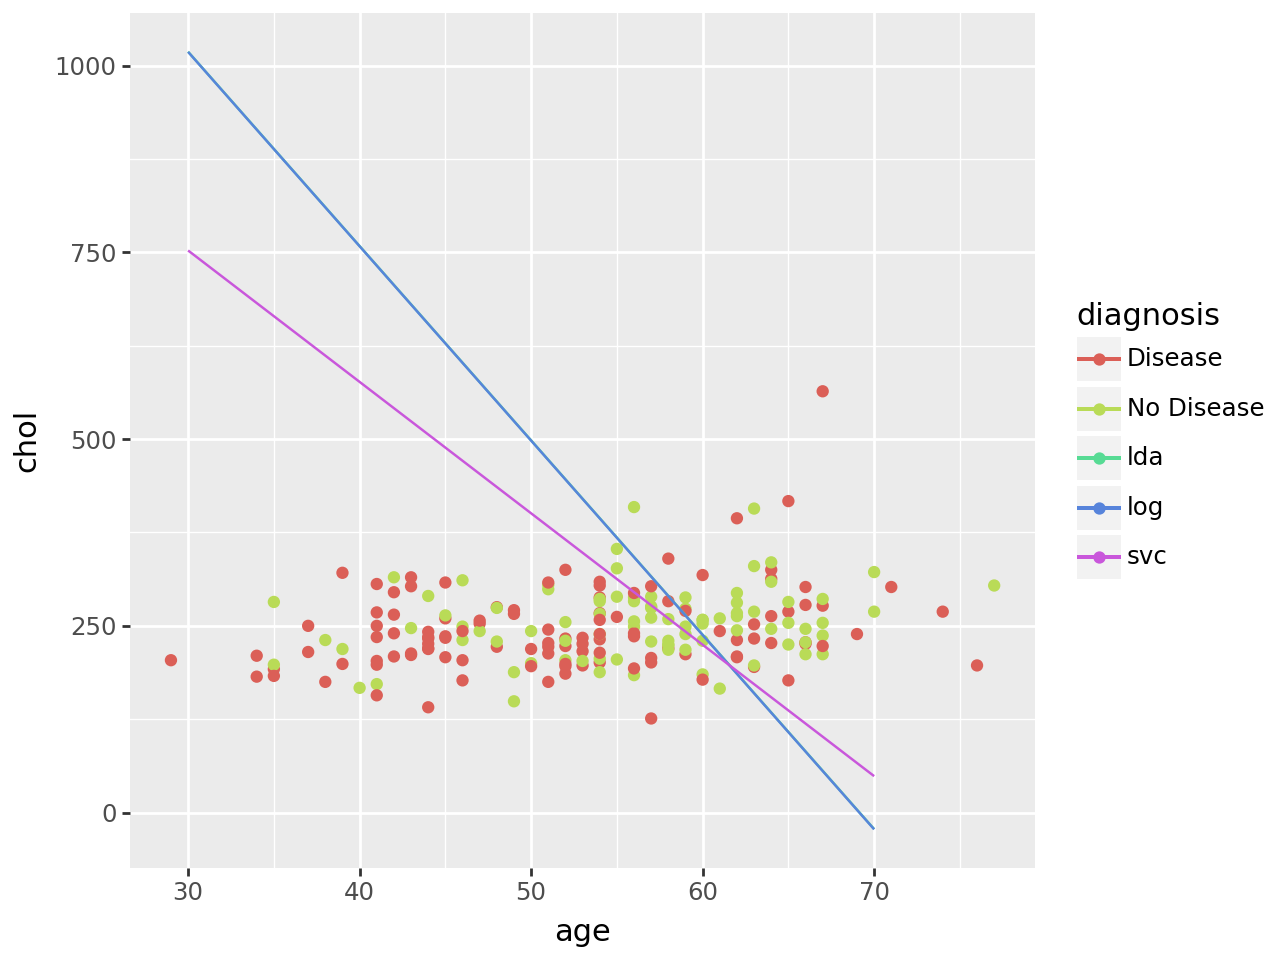

In [42]:
from plotnine import ggplot, aes, geom_point, geom_line

(ggplot(df_heart, aes(x="age", y="chol", color="diagnosis")) +
geom_point() + 
geom_line(data=df_lines, mapping=aes(x="x", y="y", color="method"))
)